<a href="https://colab.research.google.com/github/kaspergroenbek98/first-first-year-project/blob/master/Copy_of_SklearnNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/kaspergroenbek98/first-first-year-project.git


fatal: destination path 'first-first-year-project' already exists and is not an empty directory.


In [2]:
import numpy as np
import nltk
import csv
import re
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Using pandas to load the data file into a CSV.
# ISO-8859-1 is the encoding for tweets.
df = pd.read_csv("first-first-year-project/data.csv", encoding = "ISO-8859-1")
#First step to cleaning the data, removing the categories we dont need.
data = df.drop(["other_topic","resolution_topics", "tweet_coord", "tweet_created","tweet_id", "name", "retweet_count", "tweet_date", "user_timezone"], axis = 1)
data


,gender,Resolution_Category,text,tweet_location,tweet_state,tweet_region
0,female,Health & Fitness,"#NewYearsResolution :: Read more books, No scr...",Southern California,CA,West
1,female,Humor,#NewYearsResolution Finally master @ZJ10 's pa...,New Jersey,NJ,Northeast
2,male,Personal Growth,#NewYearsResolution to stop being so damn perf...,Hollywood,CA,West
3,male,Philanthropic,My #NewYearsResolution is to help my disabled ...,Metro NYC,NY,Northeast
4,female,Personal Growth,#NewYearsResolution #2015Goals #2015bucketlist...,"Pittsburgh, Pennsylvania",PA,Northeast
...,...,...,...,...,...,...
5006,female,Recreation & Leisure,Tomorrow I start @JustifiedFX because @natalie...,NC/TN,TN,South
5007,female,Humor,"holy crap, people. EYES OPEN WHEN DRIVING. #Ne...","charleston, nyc",NY,Northeast
5008,female,Humor,RT @moJO_SHabby: Start parody of her blog #NYR...,Memphis,TN,South
5009,female,Career,RT @kscmaghirang: To have an excellent job bef...,Paris USA,TX,South


In [0]:
#Time for RegEx cleaning/processing.
def cleaner(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('b4', 'before', text)
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub('https?://[A-Za-z0-9./]+','', text)
    text = text.strip(' ')
    return text

In [0]:
#Cleaning all the text in our data with our newly build cleaner function.
for i in range(len(data.text)):
  data.text[i] = cleaner(data.text[i])

from sklearn.model_selection import train_test_split
#Splitting the data into train and test set. + shuffling while doing so. the test size is = 20%.
train, test = train_test_split(data,train_size=0.8, test_size=0.2, shuffle=True)


In [6]:
#Using Sklearn, playing around with the CountVectorizer.
vectorizer = CountVectorizer(analyzer="word", lowercase=True, stop_words= "english",min_df= 1, binary= True)
#Create vectorized train set
X_train = vectorizer.fit_transform(train.text)
X_train.toarray()
#Create vectorized test set
X_test = vectorizer.transform(test.text)
X_test.toarray()
# print(vectorizer.get_feature_names())
# print(vectorizer.vocabulary_.get(u"newyearsresolution"))
# print(X_train.toarray())
# print(X_train.shape)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
#Here we use term frequency to downscale the importance of words occuring many times in a tweet. That way we hopefully get more weighted words. 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
print(X_train_tfidf.shape)
X_test_tfidf = tfidf_transformer.fit_transform(X_test)
print(X_test_tfidf.shape)


(4008, 8044)
(1003, 8044)


In [8]:
from sklearn.naive_bayes import MultinomialNB
NBmodel = MultinomialNB().fit(X_train, train.Resolution_Category)
#Accuracy without using term frequency.
predicted_1 = NBmodel.predict(X_test)
np.mean(predicted_1 == test.Resolution_Category)


0.4675972083748754

In [9]:
NBmodel = MultinomialNB().fit(X_train_tfidf, train.Resolution_Category)
#Accuracy using term frequency. (Odd that its lower, but we do have a small data set)
predicted_2 = NBmodel.predict(X_test_tfidf)
np.mean(predicted_2 == test.Resolution_Category)

0.4127617148554337

In [10]:
from sklearn import metrics
#A classification_report. Right now its pretty trash.
print(metrics.classification_report(test.Resolution_Category, predicted_1))

                              precision    recall  f1-score   support

                      Career       0.00      0.00      0.00        26
          Education/Training       0.00      0.00      0.00        14
Family/Friends/Relationships       0.50      0.01      0.02        82
                     Finance       1.00      0.17      0.29        35
            Health & Fitness       0.68      0.57      0.62       159
                       Humor       0.53      0.22      0.32       218
             Personal Growth       0.41      0.93      0.57       335
               Philanthropic       0.00      0.00      0.00        15
        Recreation & Leisure       0.69      0.11      0.19       102
Time Management/Organization       0.00      0.00      0.00        17

                    accuracy                           0.47      1003
                   macro avg       0.38      0.20      0.20      1003
                weighted avg       0.51      0.47      0.39      1003



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:

#just creating a list of the different categories in the "Resolution_Category" column.
cat = set()
for i in test.Resolution_Category:
  cat.add(i)
categories = list(cat)

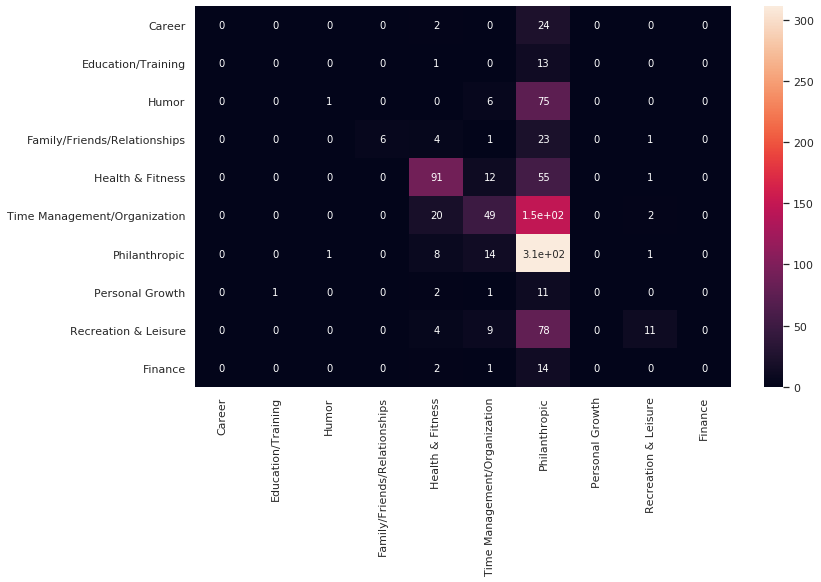

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt

array = metrics.confusion_matrix(test.Resolution_Category, predicted_1)
plt.figure(figsize=(12,7))
sn.set(font_scale=1) # for x/y label size
sn.heatmap(array, annot=True, annot_kws={"size": 10}, xticklabels = categories, yticklabels = categories) # annot_kws is the size of the numbers.
plt.show()